In [441]:
import pandas as pd
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
np.set_printoptions(precision=2) 

# read the .domain file, assuming it's a text file with column names
with open('cal_housing.domain', 'r') as f:
    columns = f.read().splitlines()

# read the .data file, assuming it's a csv-like file without header
data = pd.read_csv('cal_housing.data', header=None, names=columns)

# save the combined file as .csv
data.to_csv('combined.csv', index=False)

Extract the data from the CSV file

In [442]:
df = pd.read_csv('combined.csv')
print(df.head())
print(df.info())

   longitude  latitude  housingMedianAge  totalRooms  totalBedrooms  \
0    -122.23     37.88              41.0       880.0          129.0   
1    -122.22     37.86              21.0      7099.0         1106.0   
2    -122.24     37.85              52.0      1467.0          190.0   
3    -122.25     37.85              52.0      1274.0          235.0   
4    -122.25     37.85              52.0      1627.0          280.0   

   population  households  medianIncome  medianHouseValue  
0       322.0       126.0        8.3252          452600.0  
1      2401.0      1138.0        8.3014          358500.0  
2       496.0       177.0        7.2574          352100.0  
3       558.0       219.0        5.6431          341300.0  
4       565.0       259.0        3.8462          342200.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   longit

In [443]:


# 将数据转换为矩阵
matrix = df.values

size = matrix.shape

# Print the magnitude
print(size)
random.shuffle(matrix)
# 打印矩阵
#print(matrix)

(20640, 9)


In [444]:
x_train = matrix[:, :-1]
#Remove the last column of matrix to get the training data
x_size=x_train.shape
print(x_size)


(20640, 8)


In [445]:
y_train = matrix[:, -1:]
y_train=np.squeeze(np.transpose(y_train))
y_train=y_train/1000

# Print the new matrix
y_size=y_train.shape
print(y_size)

(20640,)


Calculate some data that is more suitbale for the prediction:
rooms_per_household = total_rooms / households
bedrooms_per_room = total_bedrooms / total_rooms
population_per_household = population / household

In [446]:
total_rooms = x_train[:,3]
total_bedrooms  = x_train[:,4]
population = x_train[:,5]
households = x_train[:,6]
#print(total_rooms[:3])
rooms_per_household = total_rooms/households
bedrooms_per_room = total_bedrooms / total_rooms
population_per_household = population / households
x_train = np.column_stack((x_train,rooms_per_household))
x_train = np.column_stack((x_train,bedrooms_per_room))
x_train = np.column_stack((x_train,population_per_household))
print(x_train[:3])


[[-1.22e+02  3.79e+01  4.10e+01  8.80e+02  1.29e+02  3.22e+02  1.26e+02
   8.33e+00  6.98e+00  1.47e-01  2.56e+00]
 [-1.22e+02  3.79e+01  2.10e+01  7.10e+03  1.11e+03  2.40e+03  1.14e+03
   8.30e+00  6.24e+00  1.56e-01  2.11e+00]
 [-1.22e+02  3.79e+01  4.10e+01  8.80e+02  1.29e+02  3.22e+02  1.26e+02
   8.33e+00  6.98e+00  1.47e-01  2.56e+00]]


Standardise the data

In [447]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the data of each column
x_train = scaler.fit_transform(x_train)
print(x_train[:8])


[[-1.18  0.92  0.77 -0.76 -0.95 -0.95 -0.94  2.4   0.58 -1.18 -0.39]
 [-1.17  0.91 -0.79  2.17  1.44  0.95  1.74  2.39  0.32 -1.03 -0.86]
 [-1.18  0.92  0.77 -0.76 -0.95 -0.95 -0.94  2.4   0.58 -1.18 -0.39]
 [-1.18  0.92  0.77 -0.76 -0.95 -0.95 -0.94  2.4   0.58 -1.18 -0.39]
 [-1.19  0.9   1.62 -0.41 -0.58 -0.73 -0.59  0.06  0.33 -0.75 -0.78]
 [-1.19  0.9   1.62 -0.41 -0.58 -0.73 -0.59  0.06  0.33 -0.75 -0.78]
 [-1.19  0.9   1.62  0.02 -0.07 -0.24  0.09 -0.03 -0.15 -0.4  -0.84]
 [-1.19  0.9   1.62 -0.57 -0.69 -0.73 -0.7   1.    0.16 -0.54 -0.39]]


In [448]:
print(f"X Shape: {x_train.shape}, X Type:{type(x_train)})")
print(x_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (20640, 11), X Type:<class 'numpy.ndarray'>)
[[-1.18  0.92  0.77 ...  0.58 -1.18 -0.39]
 [-1.17  0.91 -0.79 ...  0.32 -1.03 -0.86]
 [-1.18  0.92  0.77 ...  0.58 -1.18 -0.39]
 ...
 [ 1.07 -0.15 -1.25 ... -0.01 -0.19 -0.43]
 [-1.18  1.02  1.39 ...  0.24 -0.41 -0.16]
 [ 0.81 -0.87  0.46 ... -1.03  3.84 -0.6 ]]
y Shape: (20640,), y Type:<class 'numpy.ndarray'>)
[452.6 358.5 452.6 ...  81.7 103.5 275. ]


Seperate training set

In [449]:
x_train = x_train[:16000]
x_test = x_train[-4640:]
y_train = y_train[:16000]
y_test = y_train[-4640:]
y_shape = y_test.shape
print(y_shape)
print(x_train[:8])
print(y_train[:8])
print(x_test[:8])
print(y_test[:8])

(4640,)
[[-1.18  0.92  0.77 -0.76 -0.95 -0.95 -0.94  2.4   0.58 -1.18 -0.39]
 [-1.17  0.91 -0.79  2.17  1.44  0.95  1.74  2.39  0.32 -1.03 -0.86]
 [-1.18  0.92  0.77 -0.76 -0.95 -0.95 -0.94  2.4   0.58 -1.18 -0.39]
 [-1.18  0.92  0.77 -0.76 -0.95 -0.95 -0.94  2.4   0.58 -1.18 -0.39]
 [-1.19  0.9   1.62 -0.41 -0.58 -0.73 -0.59  0.06  0.33 -0.75 -0.78]
 [-1.19  0.9   1.62 -0.41 -0.58 -0.73 -0.59  0.06  0.33 -0.75 -0.78]
 [-1.19  0.9   1.62  0.02 -0.07 -0.24  0.09 -0.03 -0.15 -0.4  -0.84]
 [-1.19  0.9   1.62 -0.57 -0.69 -0.73 -0.7   1.    0.16 -0.54 -0.39]]
[452.6 358.5 452.6 452.6 342.2 342.2 299.2 341.3]
[[ 8.60e-01 -9.35e-01  6.89e-01 -4.42e-01 -2.39e-01  5.06e-01 -1.45e-01
  -7.63e-01 -6.20e-01  8.94e-01  1.66e+00]
 [-1.08e+00  9.52e-01  6.76e-02 -2.53e-01 -4.98e-01 -5.09e-01 -4.36e-01
   6.39e-01  2.90e-01 -9.53e-01 -4.07e-01]
 [ 9.90e-01 -1.02e+00  1.45e-01  2.70e-01  2.29e-01  7.66e-01  3.29e-01
   6.39e-02 -1.09e-01 -2.93e-01  7.58e-01]
 [-1.20e+00  9.09e-01  1.62e+00 -2.17e-01 -1

Compute Cost

In [450]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]

    cost = 0.0
    for i in range(m): 
        #print(f"X[i]:{X[i]}")
        #print(f"w):{w}")                       
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        #print(f"np.dot(X[i], w):{np.dot(X[i], w)}")
        #print(f"f_wb_i:{f_wb_i}")
        #print(f"y={y}")
        cost = cost + (f_wb_i - y[i])**2       #scalar
        #print(f"This is cost:{cost}")
    cost = cost / (2 * m)                      #scalar    
    #print(f"This is cost:{cost}")
    return cost

Compute gradient with multivaribles

In [451]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

Performing gradient decent

In [452]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x_test, y_test, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(J_history[-1])
            print(f"Iteration {i}: Cost {J_history[-1]}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [453]:
# initialize parameters
initial_w = np.zeros((11,))
initial_b = 0.

# some gradient descent settings
iterations = 1000
alpha = 0.5
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

9401.814231058479
Iteration 0: Cost 9401.814231058479   


2348.100833525812
Iteration 100: Cost 2348.100833525812   
2340.8158062555353
Iteration 200: Cost 2340.8158062555353   
2339.710052601463
Iteration 300: Cost 2339.710052601463   
2339.303816753452
Iteration 400: Cost 2339.303816753452   
2339.1046478505937
Iteration 500: Cost 2339.1046478505937   
2338.997659638956
Iteration 600: Cost 2338.997659638956   
2338.9374055651942
Iteration 700: Cost 2338.9374055651942   
2338.9021574151925
Iteration 800: Cost 2338.9021574151925   
2338.880830031914
Iteration 900: Cost 2338.880830031914   
b,w found by gradient descent: 196.86,[-59.02 -77.24  11.34   8.86  -2.91 -36.99  36.03  81.57   7.9   20.35
 -12.34] 
prediction: 382.19, target value: 452.6
prediction: 416.38, target value: 358.5
prediction: 382.19, target value: 452.6
prediction: 382.19, target value: 452.6
prediction: 221.35, target value: 342.2
prediction: 221.35, target value: 342.2
prediction: 226.56, target value: 299.2
prediction: 291.13, target value: 341.3
prediction: 221.35, ta

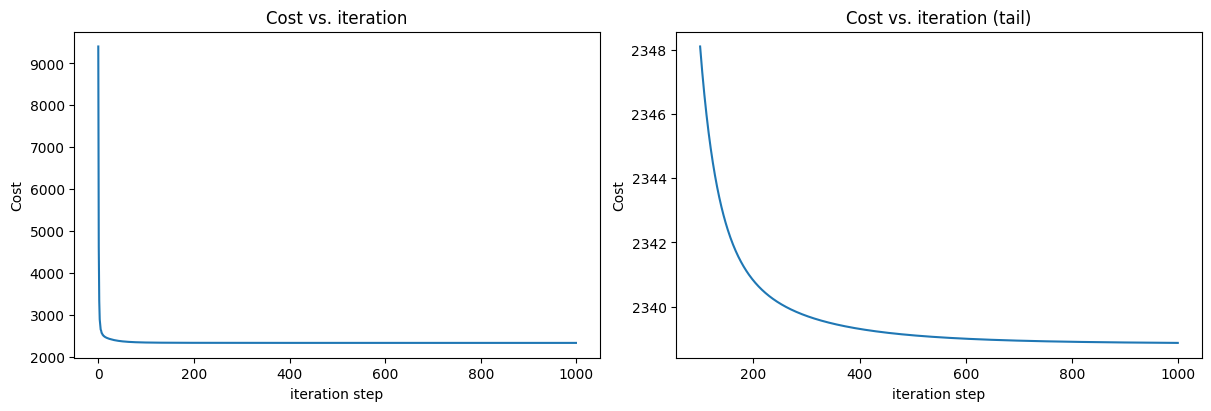

In [459]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot( 100+np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

In [455]:
m,_ = x_test.shape
for i in range(m):
    print(f"prediction: {np.dot(x_test[i], w_final) + b_final:0.2f}, target value: {y_test[i]}")
cost=compute_cost(x_test,y_test,w_final,b_final)
print(f"cost = {cost}")

prediction: 129.52, target value: 137.5
prediction: 229.94, target value: 202.3
prediction: 193.24, target value: 211.8
prediction: 157.93, target value: 169.9
prediction: 214.09, target value: 74.8
prediction: 126.98, target value: 142.5
prediction: 264.49, target value: 248.8
prediction: 109.55, target value: 215.1
prediction: 87.04, target value: 77.8
prediction: 142.20, target value: 170.6
prediction: 226.56, target value: 269.4
prediction: 323.97, target value: 405.8
prediction: 148.50, target value: 99.7
prediction: 306.65, target value: 306.4
prediction: 164.58, target value: 218.8
prediction: 154.47, target value: 169.8
prediction: 214.80, target value: 90.4
prediction: 308.03, target value: 262.1
prediction: 233.47, target value: 210.7
prediction: 257.82, target value: 234.8
prediction: 215.31, target value: 160.3
prediction: 134.43, target value: 105.5
prediction: 149.94, target value: 183.9
prediction: 292.84, target value: 359.4
prediction: 195.42, target value: 192.0
predi